In [1]:
import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
%matplotlib inline 
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('batch_10.csv')
df

,gas,ppm,s1_delta_r,s1_normalized_r,s1_max_alpha_0.001,s1_max_alpha_0.01,s1_max_alpha_0.1,\ns1_min_alpha_0.001,s1_min_alpha_0.01,s1_min_alpha_0.1,...,s15_min_alpha_0.01,s15_min_alpha_0.1,s16_delta_r,s16_normalized_r,s16_max_alpha_0.001,s16_max_alpha_0.01,s16_max_alpha_0.1,\ns16_min_alpha_0.001,s16_min_alpha_0.01,s16_min_alpha_0.1
0,4,10.0,12285.6582,4.076635,4.842317,7.509393,10.822436,-1.312657,-1.853717,-6.924985,...,-0.747592,-3.440387,1784.5324,1.907000,1.729200,4.881194,8.623828,-0.314110,-0.661556,-3.521663
1,3,50.0,-35.6889,0.993944,0.166099,0.489363,3.484663,-0.130298,-0.528364,-3.735347,...,-0.622342,-4.482534,904.9898,1.433707,1.068069,2.532958,5.369720,-0.183779,-0.534087,-4.635975
2,4,250.0,63927.2217,14.956941,19.971376,29.188512,33.291320,-10.433776,-16.062245,-49.490143,...,-7.762551,-25.150090,14585.7879,8.189021,6.099452,12.127991,15.709651,-3.887082,-6.731473,-19.326895
3,3,600.0,2992.9019,1.380553,0.808910,1.288259,4.660135,-0.755903,-1.120470,-4.075213,...,-3.244969,-7.215792,6044.5554,3.488295,2.662288,5.938297,8.544508,-1.567322,-2.701235,-6.472439
4,4,150.0,57524.7812,11.912566,14.631496,19.809240,23.715868,-9.084750,-11.770585,-39.234003,...,-5.093413,-10.248794,10580.1006,5.752675,3.880740,8.545897,11.831716,-2.655521,-4.312744,-8.510591
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3595,5,50.0,28929.5108,3.309200,4.393300,5.057000,9.423300,-3.879400,-5.415100,-15.933500,...,-1.494200,-4.480800,5480.6582,2.851000,1.046500,2.039900,5.341900,-0.842830,-1.407700,-4.447900
3596,4,250.0,40392.1230,3.280000,10.268900,13.585900,20.979000,-8.173200,-10.859100,-31.802700,...,-8.394200,-15.949400,15700.0969,5.216200,5.167500,8.995000,11.591700,-4.495400,-7.655300,-12.767100
3597,5,600.0,183271.5898,15.594500,45.480300,63.877500,81.139600,-29.539100,-47.626600,-329.266900,...,-33.976800,-62.745700,50936.2070,17.808000,17.288700,26.789500,33.366100,-15.823700,-28.516200,-56.332800
3598,4,150.0,29059.8516,2.568000,6.714200,8.786500,13.987800,-6.041100,-8.070700,-22.322300,...,-5.256300,-10.409100,10079.5098,3.539900,3.266000,6.249900,9.026200,-2.849500,-4.734300,-9.573100


In [3]:
df['gas'].value_counts()

5    600
3    600
1    600
6    600
4    600
2    600
Name: gas, dtype: int64

In [4]:
df.keys()

Index(['gas', 'ppm', 's1_delta_r', 's1_normalized_r', 's1_max_alpha_0.001',
       's1_max_alpha_0.01', 's1_max_alpha_0.1', '\ns1_min_alpha_0.001',
       's1_min_alpha_0.01', 's1_min_alpha_0.1',
       ...
       's15_min_alpha_0.01', 's15_min_alpha_0.1', 's16_delta_r',
       's16_normalized_r', 's16_max_alpha_0.001', 's16_max_alpha_0.01',
       's16_max_alpha_0.1', '\ns16_min_alpha_0.001', 's16_min_alpha_0.01',
       's16_min_alpha_0.1'],
      dtype='object', length=130)

In [5]:
X1=np.array(df)

In [6]:
X = X1[:,1:130]
X = np.asarray(X)
X[0:5]

array([[ 1.00000000e+01,  1.22856582e+04,  4.07663500e+00,
         4.84231700e+00,  7.50939300e+00,  1.08224360e+01,
        -1.31265700e+00, -1.85371700e+00, -6.92498500e+00,
         1.18009233e+04,  4.48350000e+00,  5.72252300e+00,
         9.37927600e+00,  1.23911310e+01, -1.38875400e+00,
        -1.98940700e+00, -6.05179600e+00,  1.37604390e+03,
         1.61786100e+00,  1.07168600e+00,  2.69170900e+00,
         5.25456800e+00, -2.38784000e-01, -5.02758000e-01,
        -2.69201700e+00,  1.40607980e+03,  1.59732300e+00,
         1.12520000e+00,  2.87514500e+00,  6.11345400e+00,
        -2.41244000e-01, -5.39790000e-01, -3.08765900e+00,
         6.27143100e+02,  1.52189600e+00,  6.54415000e-01,
         2.10811200e+00,  4.64227000e+00, -1.25025000e-01,
        -3.90274000e-01, -2.41937200e+00,  5.39464600e+02,
         1.68227500e+00,  5.15317000e-01,  1.64523500e+00,
         3.81746100e+00, -1.03626000e-01, -3.31580000e-01,
        -2.09017900e+00,  1.80061110e+03,  1.80191600e+0

In [7]:
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
X[0:5]

array([[-0.83631236, -0.56151663, -0.34140317, -0.44487561, -0.40555065,
        -0.35704829,  0.6518495 ,  0.51258606,  0.3934568 , -0.58659106,
        -0.36342587, -0.47344052, -0.43778455, -0.39647604,  0.67156379,
         0.50496815,  0.40523341, -0.8746042 , -0.86598551, -0.77843456,
        -0.76522524, -0.72790002,  0.78718096,  0.74164218,  0.58320243,
        -0.91151758, -0.89241226, -0.79296835, -0.76402114, -0.63502325,
         0.8250005 ,  0.77020538,  0.57885444, -1.09877178, -1.0764432 ,
        -0.83294559, -0.64596531, -0.53069834,  1.07926046,  1.02990072,
         0.91583874, -1.10395179, -1.00346945, -0.88791647, -0.73857638,
        -0.7390717 ,  1.09886791,  1.0691858 ,  1.04264033, -0.86127357,
        -0.86872524, -0.73280144, -0.68857281, -0.72273823,  0.76880762,
         0.7233168 ,  0.5647134 , -0.8768528 , -0.88745276, -0.74962751,
        -0.70245733, -0.70106774,  0.78283992,  0.7344342 ,  0.55936368,
        -0.55173523, -0.26994926, -0.42459016, -0.3

In [8]:
df['gas'] = df['gas'].astype('int')
y = np.asarray(df['gas'])
y [0:5]

array([4, 3, 4, 3, 4])

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (2880, 129) (2880,)
Test set: (720, 129) (720,)


In [10]:
from sklearn import svm
clf = svm.SVC(kernel='rbf')
clf.fit(X_train, y_train) 

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [11]:
yhat = clf.predict(X_test)
yhat [0:5]

print('ground truth           :',y_test)
print('predicted class        :',yhat)

print('cross validation acc   :',clf.score(X_test,y_test).mean())

ground truth           : [3 6 3 4 6 3 3 1 2 2 2 3 5 3 3 4 3 1 4 1 2 3 2 4 4 3 4 4 4 1 2 6 4 5 1 4 2
 4 2 4 2 3 3 3 6 3 5 1 3 2 5 6 2 6 2 2 5 4 2 5 4 5 5 2 5 1 4 5 3 5 1 6 4 6
 5 4 5 2 6 4 3 6 2 5 2 2 4 1 1 4 4 6 3 5 1 4 6 5 5 6 1 4 3 3 3 1 5 6 4 6 6
 5 5 2 5 2 1 2 4 2 1 5 1 1 1 1 4 3 2 5 3 1 2 6 2 1 4 2 5 2 4 4 5 3 1 3 4 3
 2 5 2 5 3 6 5 5 4 5 2 2 5 4 2 1 2 5 6 4 1 5 3 2 1 6 2 6 3 3 6 3 5 5 5 6 2
 6 3 4 3 5 5 6 3 6 3 6 2 2 4 4 1 4 3 2 5 2 6 2 5 6 6 2 4 6 5 3 6 4 4 5 5 3
 3 6 4 3 4 2 4 2 5 3 5 2 5 1 3 1 2 3 4 2 6 1 5 5 1 5 2 1 3 2 2 2 5 2 1 1 1
 5 1 2 6 4 4 4 1 3 5 3 2 2 6 2 6 2 4 1 1 4 2 3 6 5 4 3 5 6 4 4 4 2 4 4 6 3
 2 4 5 2 2 5 1 6 2 2 1 1 3 2 4 5 4 5 4 5 4 1 4 4 2 6 5 5 6 3 1 3 2 2 2 2 5
 4 1 4 3 5 1 1 5 5 4 1 3 2 3 4 4 6 5 4 5 4 2 4 6 6 4 3 5 1 6 1 5 3 2 1 4 5
 3 6 4 6 5 2 6 5 1 3 4 2 1 4 6 6 4 2 2 3 3 1 3 4 5 5 4 4 6 4 2 2 4 2 3 4 1
 1 6 5 1 1 5 4 4 2 1 3 1 5 2 3 2 4 4 6 1 4 6 6 6 6 2 5 4 3 3 1 2 6 2 2 5 2
 6 1 6 6 4 1 5 5 4 6 3 5 4 5 1 4 6 2 5 3 6 6 5 6 4 5 3 5 6 3 4 6 2 5 4 5 3


In [12]:
from sklearn import metrics

print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))


Test set Accuracy:  0.9722222222222222


In [13]:
yhat = clf.predict(X_test)
yhat [0:5]

array([3, 6, 3, 4, 6])

In [14]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools

In [15]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

              precision    recall  f1-score   support

           1       1.00      1.00      1.00       101
           2       0.91      0.99      0.95       140
           3       0.99      0.88      0.93       111
           4       0.99      0.98      0.98       136
           5       0.99      1.00      1.00       128
           6       0.97      0.98      0.98       104

    accuracy                           0.97       720
   macro avg       0.98      0.97      0.97       720
weighted avg       0.97      0.97      0.97       720

Confusion matrix, without normalization
[[101   0   0   0   0   0]
 [  0 138   1   0   1   0]
 [  0  13  98   0   0   0]
 [  0   0   0 133   0   3]
 [  0   0   0   0 128   0]
 [  0   0   0   2   0 102]]


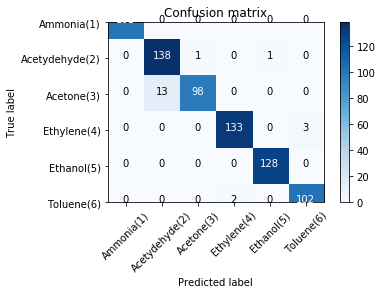

In [16]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,2,3,4,5,6])
np.set_printoptions(precision=2)

print (classification_report(y_test, yhat))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Ammonia(1)','Acetydehyde(2)','Acetone(3)','Ethylene(4)','Ethanol(5)','Toluene(6)'],normalize= False,  title='Confusion matrix')

In [17]:
from sklearn.metrics import classification_report
print(classification_report(y_test, yhat, labels=[1, 2, 3, 4, 5, 6]))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00       101
           2       0.91      0.99      0.95       140
           3       0.99      0.88      0.93       111
           4       0.99      0.98      0.98       136
           5       0.99      1.00      1.00       128
           6       0.97      0.98      0.98       104

    accuracy                           0.97       720
   macro avg       0.98      0.97      0.97       720
weighted avg       0.97      0.97      0.97       720



In [18]:
from sklearn import svm
clf = svm.SVC(kernel='linear')
clf.fit(X_train, y_train) 

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [19]:
yhat = clf.predict(X_test)
yhat [0:5]

print('ground truth           :',y_test)
print('predicted class        :',yhat)


print('cross validation acc   :',clf.score(X_test,y_test).mean())

ground truth           : [3 6 3 4 6 3 3 1 2 2 2 3 5 3 3 4 3 1 4 1 2 3 2 4 4 3 4 4 4 1 2 6 4 5 1 4 2
 4 2 4 2 3 3 3 6 3 5 1 3 2 5 6 2 6 2 2 5 4 2 5 4 5 5 2 5 1 4 5 3 5 1 6 4 6
 5 4 5 2 6 4 3 6 2 5 2 2 4 1 1 4 4 6 3 5 1 4 6 5 5 6 1 4 3 3 3 1 5 6 4 6 6
 5 5 2 5 2 1 2 4 2 1 5 1 1 1 1 4 3 2 5 3 1 2 6 2 1 4 2 5 2 4 4 5 3 1 3 4 3
 2 5 2 5 3 6 5 5 4 5 2 2 5 4 2 1 2 5 6 4 1 5 3 2 1 6 2 6 3 3 6 3 5 5 5 6 2
 6 3 4 3 5 5 6 3 6 3 6 2 2 4 4 1 4 3 2 5 2 6 2 5 6 6 2 4 6 5 3 6 4 4 5 5 3
 3 6 4 3 4 2 4 2 5 3 5 2 5 1 3 1 2 3 4 2 6 1 5 5 1 5 2 1 3 2 2 2 5 2 1 1 1
 5 1 2 6 4 4 4 1 3 5 3 2 2 6 2 6 2 4 1 1 4 2 3 6 5 4 3 5 6 4 4 4 2 4 4 6 3
 2 4 5 2 2 5 1 6 2 2 1 1 3 2 4 5 4 5 4 5 4 1 4 4 2 6 5 5 6 3 1 3 2 2 2 2 5
 4 1 4 3 5 1 1 5 5 4 1 3 2 3 4 4 6 5 4 5 4 2 4 6 6 4 3 5 1 6 1 5 3 2 1 4 5
 3 6 4 6 5 2 6 5 1 3 4 2 1 4 6 6 4 2 2 3 3 1 3 4 5 5 4 4 6 4 2 2 4 2 3 4 1
 1 6 5 1 1 5 4 4 2 1 3 1 5 2 3 2 4 4 6 1 4 6 6 6 6 2 5 4 3 3 1 2 6 2 2 5 2
 6 1 6 6 4 1 5 5 4 6 3 5 4 5 1 4 6 2 5 3 6 6 5 6 4 5 3 5 6 3 4 6 2 5 4 5 3


In [20]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools

              precision    recall  f1-score   support

           1       1.00      1.00      1.00       101
           2       0.99      0.99      0.99       140
           3       0.99      1.00      1.00       111
           4       0.99      1.00      1.00       136
           5       1.00      0.99      1.00       128
           6       1.00      0.99      1.00       104

    accuracy                           1.00       720
   macro avg       1.00      1.00      1.00       720
weighted avg       1.00      1.00      1.00       720

Confusion matrix, without normalization
[[101   0   0   0   0   0]
 [  0 139   1   0   0   0]
 [  0   0 111   0   0   0]
 [  0   0   0 136   0   0]
 [  0   1   0   0 127   0]
 [  0   0   0   1   0 103]]


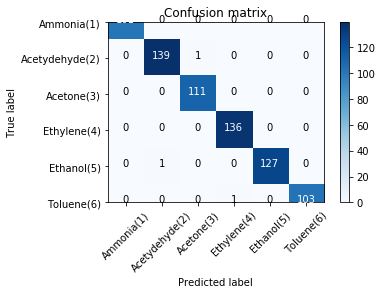

In [21]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,2,3,4,5,6])
np.set_printoptions(precision=2)

print (classification_report(y_test, yhat))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Ammonia(1)','Acetydehyde(2)','Acetone(3)','Ethylene(4)','Ethanol(5)','Toluene(6)'],normalize= False,  title='Confusion matrix')

In [22]:
from sklearn import svm
clf = svm.SVC(kernel='poly')
clf.fit(X_train, y_train) 


C:\Users\HP\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='poly', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [23]:
yhat = clf.predict(X_test)
yhat [0:5]

print('ground truth           :',y_test)
print('predicted class        :',yhat)


print('cross validation acc   :',clf.score(X_test,y_test).mean())

ground truth           : [3 6 3 4 6 3 3 1 2 2 2 3 5 3 3 4 3 1 4 1 2 3 2 4 4 3 4 4 4 1 2 6 4 5 1 4 2
 4 2 4 2 3 3 3 6 3 5 1 3 2 5 6 2 6 2 2 5 4 2 5 4 5 5 2 5 1 4 5 3 5 1 6 4 6
 5 4 5 2 6 4 3 6 2 5 2 2 4 1 1 4 4 6 3 5 1 4 6 5 5 6 1 4 3 3 3 1 5 6 4 6 6
 5 5 2 5 2 1 2 4 2 1 5 1 1 1 1 4 3 2 5 3 1 2 6 2 1 4 2 5 2 4 4 5 3 1 3 4 3
 2 5 2 5 3 6 5 5 4 5 2 2 5 4 2 1 2 5 6 4 1 5 3 2 1 6 2 6 3 3 6 3 5 5 5 6 2
 6 3 4 3 5 5 6 3 6 3 6 2 2 4 4 1 4 3 2 5 2 6 2 5 6 6 2 4 6 5 3 6 4 4 5 5 3
 3 6 4 3 4 2 4 2 5 3 5 2 5 1 3 1 2 3 4 2 6 1 5 5 1 5 2 1 3 2 2 2 5 2 1 1 1
 5 1 2 6 4 4 4 1 3 5 3 2 2 6 2 6 2 4 1 1 4 2 3 6 5 4 3 5 6 4 4 4 2 4 4 6 3
 2 4 5 2 2 5 1 6 2 2 1 1 3 2 4 5 4 5 4 5 4 1 4 4 2 6 5 5 6 3 1 3 2 2 2 2 5
 4 1 4 3 5 1 1 5 5 4 1 3 2 3 4 4 6 5 4 5 4 2 4 6 6 4 3 5 1 6 1 5 3 2 1 4 5
 3 6 4 6 5 2 6 5 1 3 4 2 1 4 6 6 4 2 2 3 3 1 3 4 5 5 4 4 6 4 2 2 4 2 3 4 1
 1 6 5 1 1 5 4 4 2 1 3 1 5 2 3 2 4 4 6 1 4 6 6 6 6 2 5 4 3 3 1 2 6 2 2 5 2
 6 1 6 6 4 1 5 5 4 6 3 5 4 5 1 4 6 2 5 3 6 6 5 6 4 5 3 5 6 3 4 6 2 5 4 5 3


              precision    recall  f1-score   support

           1       0.44      1.00      0.61       101
           2       0.87      0.78      0.82       140
           3       1.00      0.68      0.81       111
           4       0.78      0.56      0.65       136
           5       1.00      0.70      0.83       128
           6       0.80      0.81      0.80       104

    accuracy                           0.74       720
   macro avg       0.82      0.75      0.75       720
weighted avg       0.83      0.74      0.76       720

Confusion matrix, without normalization
[[101   0   0   0   0   0]
 [ 30 109   0   0   0   1]
 [ 18  16  75   2   0   0]
 [ 47   0   0  76   0  13]
 [ 29   0   0   2  90   7]
 [  3   0   0  17   0  84]]


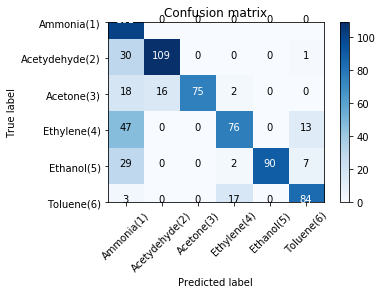

In [24]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,2,3,4,5,6])
np.set_printoptions(precision=2)

print (classification_report(y_test, yhat))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Ammonia(1)','Acetydehyde(2)','Acetone(3)','Ethylene(4)','Ethanol(5)','Toluene(6)'],normalize= False,  title='Confusion matrix')

In [25]:
from sklearn import svm
clf = svm.SVC(kernel='sigmoid')
clf.fit(X_train, y_train) 


C:\Users\HP\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='sigmoid', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [26]:
yhat = clf.predict(X_test)
yhat [0:5]

print('ground truth           :',y_test)
print('predicted class        :',yhat)


print('cross validation acc   :',clf.score(X_test,y_test).mean())

ground truth           : [3 6 3 4 6 3 3 1 2 2 2 3 5 3 3 4 3 1 4 1 2 3 2 4 4 3 4 4 4 1 2 6 4 5 1 4 2
 4 2 4 2 3 3 3 6 3 5 1 3 2 5 6 2 6 2 2 5 4 2 5 4 5 5 2 5 1 4 5 3 5 1 6 4 6
 5 4 5 2 6 4 3 6 2 5 2 2 4 1 1 4 4 6 3 5 1 4 6 5 5 6 1 4 3 3 3 1 5 6 4 6 6
 5 5 2 5 2 1 2 4 2 1 5 1 1 1 1 4 3 2 5 3 1 2 6 2 1 4 2 5 2 4 4 5 3 1 3 4 3
 2 5 2 5 3 6 5 5 4 5 2 2 5 4 2 1 2 5 6 4 1 5 3 2 1 6 2 6 3 3 6 3 5 5 5 6 2
 6 3 4 3 5 5 6 3 6 3 6 2 2 4 4 1 4 3 2 5 2 6 2 5 6 6 2 4 6 5 3 6 4 4 5 5 3
 3 6 4 3 4 2 4 2 5 3 5 2 5 1 3 1 2 3 4 2 6 1 5 5 1 5 2 1 3 2 2 2 5 2 1 1 1
 5 1 2 6 4 4 4 1 3 5 3 2 2 6 2 6 2 4 1 1 4 2 3 6 5 4 3 5 6 4 4 4 2 4 4 6 3
 2 4 5 2 2 5 1 6 2 2 1 1 3 2 4 5 4 5 4 5 4 1 4 4 2 6 5 5 6 3 1 3 2 2 2 2 5
 4 1 4 3 5 1 1 5 5 4 1 3 2 3 4 4 6 5 4 5 4 2 4 6 6 4 3 5 1 6 1 5 3 2 1 4 5
 3 6 4 6 5 2 6 5 1 3 4 2 1 4 6 6 4 2 2 3 3 1 3 4 5 5 4 4 6 4 2 2 4 2 3 4 1
 1 6 5 1 1 5 4 4 2 1 3 1 5 2 3 2 4 4 6 1 4 6 6 6 6 2 5 4 3 3 1 2 6 2 2 5 2
 6 1 6 6 4 1 5 5 4 6 3 5 4 5 1 4 6 2 5 3 6 6 5 6 4 5 3 5 6 3 4 6 2 5 4 5 3


In [ ]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,2,3,4,5,6])
np.set_printoptions(precision=2)

print (classification_report(y_test, yhat))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Ammonia(1)','Acetydehyde(2)','Acetone(3)','Ethylene(4)','Ethanol(5)','Toluene(6)'],normalize= False,  title='Confusion matrix')

              precision    recall  f1-score   support

           1       0.50      0.52      0.51       101
           2       0.63      0.31      0.42       140
           3       0.93      0.38      0.54       111
           4       0.88      0.82      0.85       136
           5       0.32      0.57      0.41       128
           6       0.63      0.88      0.73       104

    accuracy                           0.58       720
   macro avg       0.65      0.58      0.58       720
weighted avg       0.65      0.58      0.58       720

Confusion matrix, without normalization
[[ 53   0   0   3  45   0]
 [  0  44   3   1  69  23]
 [  3  15  42   0  35  16]
 [ 13   1   0 112   4   6]
 [ 36   6   0   3  73  10]
 [  0   4   0   8   0  92]]
